Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,operation,predecessor_operations,end_product,due_date,processing_time,workcenter,machine
0,F.10,[],0,0,2,WC#2,M1
1,F.20,[F.10],0,0,3,WC#1,M1
2,D.10,[],0,0,3,WC#1,M1
3,C.10,[D.10],0,0,1,WC#1,M1
4,A.10,[],0,0,5,WC#1,M1
5,A.20,[A.10],1,14,2,WC#2,M1


,workcenter,M1
0,WC#1,1
1,WC#2,1


Initial Schedule: ['A.10', 'F.10', 'D.10', 'C.10', 'A.20', 'F.20']
Initial Makespan with Machine Availability: 12
1000
1000
950.0
902.5
857.375
814.5062499999999
773.7809374999998
735.0918906249998
698.3372960937497
663.4204312890622
630.2494097246091
598.7369392383787
568.8000922764597
540.3600876626367
513.3420832795049
487.6749791155296
463.29123015975307
440.1266686517654
418.1203352191771
397.2143184582182
377.3536025353073
358.4859224085419
340.5616262881148
323.533544973709
307.35686772502356
291.98902433877237
277.38957312183373
263.52009446574203
250.3440897424549
237.82688525533214
225.93554099256554
214.63876394293726
203.9068257457904
193.71148445850088
184.02591023557582
174.82461472379703
166.08338398760716
157.7792147882268
149.89025404881545
142.39574134637468
135.27595427905592
128.5121565651031
122.08654873684794
115.98222130000555
110.18311023500526
104.673954723255
99.44025698709224
94.46824413773763
89.74483193085074
85.25759033430819
80.99471081759278
76.944975276

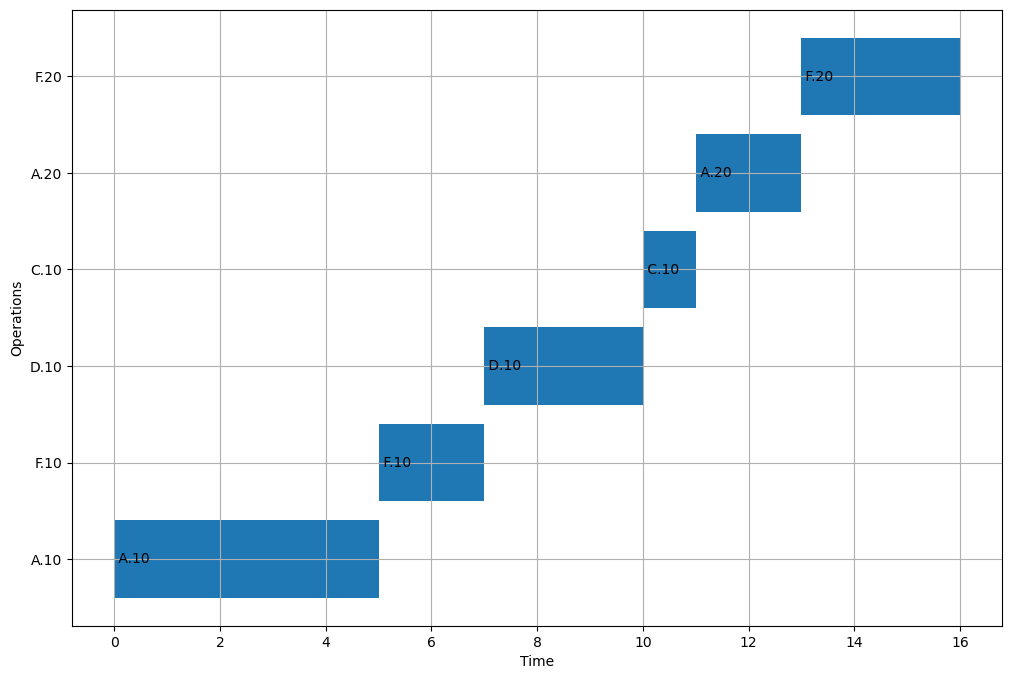

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# # Provided data
# df_BOM = pd.DataFrame({
#     'operation': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U'],
#     'predecessor_operations': [[], [], ["A"], ["B"], ["C", "D"], ["E", "G"], ["H"], [], ["F"], [], [], [], ["J", "K", "L"], ["M"], ["N"], [], [], ["P", "Q"], ["R"], ["S", "U"], []],
#     'end_product': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
#     'due_date': [None, None, None, None, None, None, None, None, 50.0, None, None, None, None, None, 80.0, None, None, None, None, 30.0, None],
#     'processing_time': [3, 2, 1, 3, 1, 3, 5, 7, 4, 18, 12, 3, 5, 10, 4, 1, 8, 7, 5, 1, 8],
#     'workcenter': ['WC#2', 'WC#1', 'WC#1', 'WC#2', 'WC#2', 'WC#2', 'WC#2', 'WC#3', 'WC#2', 'WC#1', 'WC#2', 'WC#3', 'WC#2', 'WC#2', 'WC#3', 'WC#2', 'WC#1', 'WC#1', 'WC#2', 'WC#3', 'WC#1'],
#     'machine': ["M1", "M2", "M3", "M2", "M4", "M5", "M1", "M2", "M3", "M4", "M5", "M1", "M2", "M3", "M2", "M3", "M4", "M5", "M1", "M4", "M2"]
# })

# df_machine = pd.DataFrame({
#     'workcenter': ["WC#1", "WC#2", "WC#3"],
#     'M1': [3, 2, 3],
#     'M2': [2, 1, 2],
#     'M3': [1, 2, 1],
#     'M4': [1, 1, 1],
#     'M5': [1, 2, 3]
# })


df_BOM = pd.DataFrame({
    'operation': ['F.10', 'F.20', 'D.10', 'C.10', 'A.10', 'A.20'],
    'predecessor_operations': [[], ['F.10'], [], ['D.10'], [], ['A.10']],
    'end_product': [0, 0, 0, 0, 0, 1],
    'due_date': [0, 0, 0, 0, 0, 14],
    'processing_time': [2, 3, 3, 1, 5, 2],
    'workcenter': ["WC#2", "WC#1", "WC#1", "WC#1", "WC#1", "WC#2"],
    'machine': ['M1', 'M1', 'M1', 'M1', 'M1', 'M1']
})
display(df_BOM)
df_machine = pd.DataFrame({
    'workcenter': ["WC#1", "WC#2"],
    'M1': [1, 1]
})
display(df_machine)

def initial_solution(df_BOM):
    schedule = []
    remaining_operations = set(df_BOM['operation'].tolist())
    
    while remaining_operations:
        for op in list(remaining_operations):
            predecessors = df_BOM[df_BOM['operation'] == op]['predecessor_operations'].values[0]
            if all(pred in schedule for pred in predecessors):
                schedule.append(op)
                remaining_operations.remove(op)
    
    return schedule

initial_schedule = initial_solution(df_BOM)
print("Initial Schedule:", initial_schedule)

def calculate_makespan(schedule, df_BOM, df_machine):
    end_times = {}
    machine_availability = {
        workcenter: {machine: df_machine.loc[df_machine['workcenter'] == workcenter, machine].values[0]
                     for machine in df_machine.columns if machine != 'workcenter'}
        for workcenter in df_machine['workcenter']
    }
    machine_usage = {workcenter: {machine: [] for machine in df_machine.columns if machine != 'workcenter'}
                     for workcenter in df_machine['workcenter']}

    for op in schedule:
        machine = df_BOM[df_BOM['operation'] == op]['machine'].values[0]
        workcenter = df_BOM[df_BOM['operation'] == op]['workcenter'].values[0]
        processing_time = df_BOM[df_BOM['operation'] == op]['processing_time'].values[0]
        predecessors = df_BOM[df_BOM['operation'] == op]['predecessor_operations'].values[0]

        # Calculate the earliest start time considering both predecessors and machine availability
        start_time = max([end_times.get(pred, 0) for pred in predecessors], default=0)
        
        # Ensure machine availability in the workcenter
        available_time = 0
        if machine_availability[workcenter][machine] > 0:
            if machine_usage[workcenter][machine]:
                available_time = max(machine_usage[workcenter][machine])
        
        start_time = max(start_time, available_time)

        end_time = start_time + processing_time
        end_times[op] = end_time
        machine_usage[workcenter][machine].append(end_time)

    return max(end_times.values())

# Test the revised evaluation function with machine availability
initial_makespan = calculate_makespan(initial_schedule, df_BOM, df_machine)
print("Initial Makespan with Machine Availability:", initial_makespan)

def check_precedence_constraints(schedule, df_BOM):
    operation_positions = {op: idx for idx, op in enumerate(schedule)}
    for op in schedule:
        predecessors = df_BOM[df_BOM['operation'] == op]['predecessor_operations'].values[0]
        if any(operation_positions[pred] >= operation_positions[op] for pred in predecessors):
            return False
    return True

def generate_neighbor(schedule, df_BOM):
    new_schedule = schedule[:]
    while True:
        idx1, idx2 = random.sample(range(len(schedule)), 2)
        new_schedule[idx1], new_schedule[idx2] = new_schedule[idx2], new_schedule[idx1]
        if check_precedence_constraints(new_schedule, df_BOM):
            break
        else:
            new_schedule = schedule[:]
    return new_schedule

def accept_solution(current_makespan, new_makespan, temperature):
    if new_makespan < current_makespan:
        return True
    else:
        prob = np.exp((current_makespan - new_makespan) / temperature)
        return random.random() < prob

def simulated_annealing(df_BOM, initial_schedule, initial_temperature, cooling_rate, min_temperature, iterations_per_temp):
    current_schedule = initial_schedule
    current_makespan = calculate_makespan(current_schedule, df_BOM, df_machine)
    best_schedule = current_schedule
    best_makespan = current_makespan
    temperature = initial_temperature
    print(temperature)
    while temperature > min_temperature:
        for _ in range(iterations_per_temp):
            new_schedule = generate_neighbor(current_schedule, df_BOM)
            new_makespan = calculate_makespan(new_schedule, df_BOM, df_machine)
            
            if check_precedence_constraints(new_schedule, df_BOM) and accept_solution(current_makespan, new_makespan, temperature):
                current_schedule = new_schedule
                current_makespan = new_makespan
                
                if new_makespan < best_makespan:
                    best_schedule = new_schedule
                    best_makespan = new_makespan
        print(temperature)
        temperature *= cooling_rate
    
    return best_schedule, best_makespan

# Parameters
initial_temperature = 1000
cooling_rate = 0.95
min_temperature = 1
iterations_per_temp = 50

best_schedule, best_makespan = simulated_annealing(df_BOM, initial_schedule, initial_temperature, cooling_rate, min_temperature, iterations_per_temp)
print("Best Schedule:", best_schedule)
print("Best Makespan:", best_makespan)

def generate_gantt_chart(schedule, df_BOM):
    schedule_data = []
    operation_end_times = {}
    machine_times = {machine: 0 for machine in df_BOM['machine'].unique()}

    for op in schedule:
        machine = df_BOM[df_BOM['operation'] == op]['machine'].values[0]
        processing_time = df_BOM[df_BOM['operation'] == op]['processing_time'].values[0]
        predecessors = df_BOM[df_BOM['operation'] == op]['predecessor_operations'].values[0]

        start_time = max([operation_end_times.get(pred, 0) for pred in predecessors], default=0)
        start_time = max(start_time, machine_times[machine])

        end_time = start_time + processing_time
        schedule_data.append({'Operation': op, 'Start': start_time, 'End': end_time})
        machine_times[machine] = end_time
        operation_end_times[op] = end_time

    df_schedule = pd.DataFrame(schedule_data)

    fig, ax = plt.subplots(figsize=(12, 8))

    for idx, row in df_schedule.iterrows():
        ax.broken_barh([(row['Start'], row['End'] - row['Start'])], (idx - 0.4, 0.8), facecolors=('tab:blue'))
        ax.text(row['Start'], idx, f" {row['Operation']}", va='center', ha='left')

    ax.set_yticks(range(len(df_schedule)))
    ax.set_yticklabels(df_schedule['Operation'])
    ax.set_xlabel('Time')
    ax.set_ylabel('Operations')
    ax.grid(True)

    plt.show()

generate_gantt_chart(best_schedule, df_BOM)
